# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [28]:
from __future__ import print_function
__author__ = "Sung Hoon Yang, CUSP NYU 2018"
import numpy as np
import pandas as pd
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 88}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import os
%matplotlib inline
np.random.seed(999)
import warnings
warnings.filterwarnings(action='once')

"""
Set up PUIDATA env var
"""
import os
os.environ["PUIDATA"] = "%s/fall18/PUI/PUIDATA"% os.getenv("HOME")
os.environ["PUI2018"] = "%s/fall18/PUI/PUI2018"% os.getenv("HOME")

"""
Needed for the notebook
"""
import re
from datetime import datetime
from copy import deepcopy

In [29]:
# my usual imports and setups
from getCitiBikeCSV import getCitiBikeCSV
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load(open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [30]:
import sys
sys.path.insert(0, '/nfshome/shy256/fall18/PUI/PUI2018/util/')
from evalChisq import evalChisq
datestrings = ['201512', '201507']
for d in datestrings:
    getCitiBikeCSV(d)

file in place, you can continue
file in place, you can continue


In [31]:
for d in datestrings:
    globals()['df_%s' % d] = pd.read_csv(os.getenv("PUIDATA") + "/" + d + '-citibike-tripdata.csv')

In [32]:
df_201507.shape # (1085676, 15)

(1085676, 15)

In [33]:
df_201512.shape # (804125, 15)

(804125, 15)

In [34]:
df = pd.concat([df_201512, df_201507])
df.shape # (1889801, 15)

(1889801, 15)

In [35]:
df['ix'] = range(len(df))
df.set_index('ix', inplace=True)

In [36]:
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
ix,,,,,,,,,,,,,,,
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1


In [37]:
def convert_dt(dt):
    try:
        _dt, _hr, _min, _sec = re.split(':|\s', dt) # e.g. [12/1/2015, 07, 35, 36]
        if _hr == '0':
            _hr = '00'
        return datetime.strptime('{} {}{}{}'.format(_dt, _hr, _min, _sec), '%m/%d/%Y %H%M%S')
    except Exception as e:
        print(str(e))
        return np.nan
df['date'] = df['starttime'].apply(convert_dt)
df['date'].head(7)

ix
0   2015-12-01 07:35:36
1   2015-12-01 07:38:15
2   2015-12-01 07:44:49
3   2015-12-01 08:02:29
4   2015-12-01 08:06:37
5   2015-12-01 08:07:57
6   2015-12-01 08:08:53
Name: date, dtype: datetime64[ns]

In [38]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
ix,,,,,,,,,,,,,,,,
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1,2015-12-01 07:35:36
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1,2015-12-01 07:38:15
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1,2015-12-01 07:44:49
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1,2015-12-01 08:02:29
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1,2015-12-01 08:06:37


In [39]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [40]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df[(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]['birth year']
df['ageF'] = 2015 - df[(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]['birth year']

In [41]:
# checking if my index is unique
df.shape # (1889801, 16)
len(df.index.unique()) # 1889801

1889801

In [42]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
ix,,,,,,,,,,,,,,,,,,
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1,2015-12-01 07:35:36,32.0,NaN
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1,2015-12-01 07:38:15,40.0,NaN
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1,2015-12-01 07:44:49,49.0,NaN
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1,2015-12-01 08:02:29,30.0,NaN
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1,2015-12-01 08:06:37,47.0,NaN


In [43]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,1.889801e+06,1.889801e+06,1.889801e+06,1.889801e+06,1.889801e+06,1.889801e+06,1.889801e+06,1.889801e+06,1.641559e+06,1.889801e+06,1.255483e+06,383379.000000
mean,9.583266e+02,6.276480e+02,4.073616e+01,-7.398957e+01,6.196815e+02,4.073590e+01,-7.398972e+01,1.969916e+04,1.976483e+03,1.070083e+00,3.887598e+01,37.293895
std,8.776248e+03,7.485597e+02,2.045146e-02,1.393905e-02,7.379210e+02,2.042835e-02,1.393589e-02,2.865377e+03,1.161908e+01,5.751002e-01,1.161323e+01,11.378984
min,6.000000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,4.064677e+01,-7.403805e+01,1.452900e+04,1.885000e+03,0.000000e+00,1.600000e+01,16.000000
25%,3.850000e+02,3.130000e+02,4.072182e+01,-7.399950e+01,3.120000e+02,4.072182e+01,-7.399974e+01,1.721300e+04,NaN,1.000000e+00,NaN,NaN
50%,6.230000e+02,4.320000e+02,4.073726e+01,-7.399021e+01,4.280000e+02,4.073705e+01,-7.399054e+01,1.980900e+04,NaN,1.000000e+00,NaN,NaN
75%,1.036000e+03,5.030000e+02,4.075140e+01,-7.398135e+01,5.000000e+02,4.075097e+01,-7.398142e+01,2.232800e+04,NaN,1.000000e+00,NaN,NaN
max,5.174309e+06,3.242000e+03,4.078721e+01,-7.392989e+01,3.242000e+03,4.078721e+01,-7.392989e+01,2.476900e+04,1.999000e+03,2.000000e+00,1.300000e+02,89.000000


In [44]:
__DF_RAW__ = deepcopy(df)

In [45]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


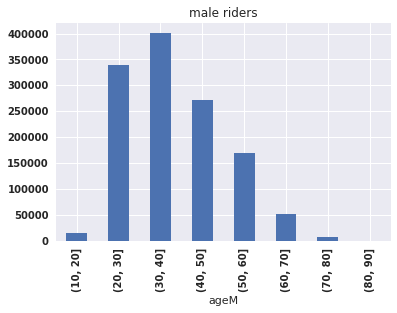

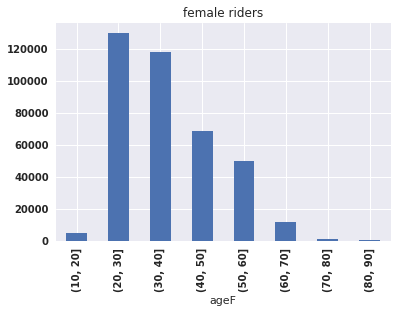

In [46]:
# plotting histograms with pandas is a bit different than with pylab
# this is a VERY USEFUL syntax for you to knonw!
bins = np.arange(10, 99, 10)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
The histogrammed distributions for male and female citibike trip counts. 20~40 year olds ride the most across both genders. However, in male trips distribution, 30~40 year old bin shows more trip counts, while in female riders distribution 20~30 records a higher trip count.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 20]       0.000407
(20, 30]       0.068005
(30, 40]       0.056184
(40, 50]       0.017647
(50, 60]       0.013164
(60, 70]       0.001765
(70, 80]       0.000311
(80, 90]       0.000000


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


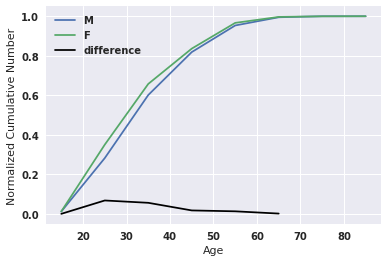

In [47]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [As discussed in the previous figure, The distributions show the general trend where 20~40 year olds take up the majority of trips, and either end of the distribution tail. The noticeable difference between 20~30 and 30~40 proportions in male and female distributions is also expressed in CDFs here, as the difference is the greatest at Age = 25]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [48]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [49]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.077581726534685036, pvalue=0.0)


**  FILL IN THE CELL BELOW!**

#### Return values for scipy.stats.ks_2samp

* D : float
    * KS statistic
* p-value : float
    * two-tailed p-value

$$
H_0:F_{female}(Age)=F_{male}(Age) 
$$
$$
H_1:F_{female}(Age)\ne F_{male}(Age) 
$$
We can reject the null hypothesis at 99% level confidence level

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [50]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

FileNotFoundError: [Errno 2] No such file or directory: '../plotsforclasses/ks2sample_table.png'

In [57]:
_nM, _nF = 300, 300
ks = scipy.stats.ks_2samp(df.ageM.iloc[:_nM], df.ageF.iloc[:_nF])
print (ks)

Ks_2sampResult(statistic=0.08666666666666667, pvalue=0.20010716764215619)


In [58]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
_alpha = 0.05
_coeff2 = np.sqrt((_nM + _nF)/(_nM * _nF))
_c = 0.18845


def k_dist(x, m=10):
    _v = 0
    for k in range(1, m+1):
        _v += np.e ** (
            (-1.0 * ((2*k - 1) ** 2) * (np.pi ** 2)) /
            (8 * (x ** 2))
        )
    return (np.sqrt(2 * np.pi) / x) * _v

## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df_M_50 = df.ageM[:_nM]
df_M_50.rename('male_age', inplace=True)
df_M_50.sort(axis=0, ascending=True, inplace=True)
df_M_50 = df_M_50.reset_index()
df_M_50.drop(labels=['ix'], axis=1, inplace=True)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [59]:
ks_dist_orig = df_M_50.apply(k_dist)
ks_dist_orig
ks_dist_orig.rename(columns={'male_age': 'ks_dist_orig'}, inplace=True)

ks_dist_inverse_orig = ks_dist_orig.apply(lambda x: 1-x)
ks_dist_inverse_orig.rename(columns={'male_age': 'ks_dist_inverse_orig'}, inplace=True)
ks_dist_inverse_orig.head(10)
male_age_std = (df_M_50 - df_M_50.mean()) / df_M_50.std()
male_age_std.rename(columns={'male_age': 'male_age_std'}, inplace=True)

# ks_dist_std = male_age_std.apply(k_dist)
# ks_dist_std.rename(columns={'male_age': 'ks-val_std'}, inplace=True)



# male_age_norm = df_M_50 / df_M_50.max()
# male_age_norm.rename(columns={'male_age': 'male_age_norm'}, inplace=True)

# ks_dist_norm = male_age_norm.apply(k_dist)
# ks_dist_norm.rename(columns={'male_age': 'ks-val_norm'}, inplace=True)



(0, 1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


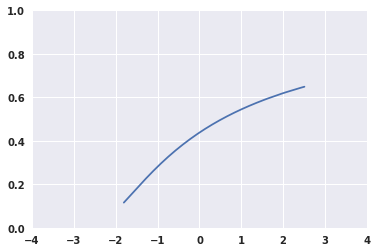

In [60]:
"""
Observation: For n sufficiently large, the values of Dn,α (two-tailed) 
(see Kolmogorov-Smirnov Test) are approximately equal to the inverse 
of the Kolmogorov distribution divided by the square root of n. 
This holds even for values of α not found in the Kolmogorov-Smirnov Table.  
"""

plt.plot(male_age_std, ks_dist_inverse_orig)
plt.xlim([-4, 4])
plt.ylim([0, 1])

In [ ]:
_df_x = male_age_std.merge(ks_dist_inverse_orig, left_index=True, right_index=True)
# get ks_dist_orig value whose male_age_std is closest to 0.16
_df_x.ix[(_df_x['male_age_std']-0.16).abs().argsort()[:1]] # 0.443421
0.50765795335732711 - 0.443421 

my hand calculated result is 0.0642369533573271 off from the calculation using scipy 

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [ ]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

# get means
# male_mean, female_mean = df.ageM.mean(), df.ageF.mean()

bins = np.arange(10, 99, 1)
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).cumsum()
dat = csM.merge(csF, how='inner', left_index=True, right_index=True)
scipy.stats.pearsonr(dat['count_nonzero_x'], dat['count_nonzero_y'])


#### Returns:	
##### r : float - Pearson’s correlation coefficient
##### p-value : float - 2-tailed p-value Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

So Null Hypothesis is 
$$
H_0: \rho = 0
$$
$$
H_1: \rho \ne 0
$$
where $$\rho$$ is the correlation
We reject Null Hypothesis at 99% Confidence level

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [ ]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
scipy.stats.spearmanr(dat['count_nonzero_x'], dat['count_nonzero_y'])

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**


#### Returns:	
##### correlation : float or ndarray (2-D square)
Spearman correlation matrix or correlation coefficient (if only 2 variables are given as parameters. Correlation matrix is square with length equal to total number of variables (columns or rows) in a and b combined.

##### pvalue : float
The two-sided p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated, has same dimension as rho.
So Null Hypothesis is 
$$
H_0: \rho = 0
$$
$$
H_1: \rho \ne 0
$$
where $$\rho$$ is the correlation
We reject Null Hypothesis at 99% Confidence level

#### from here forward,
I will be answering below two questions:

1. trip duration of bikers that ride during the day vs night

2. age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)

Using 3 tests: KS, Pearson's, Spearman's. 

#### 1) trip duration of bikers that ride during the day vs night
##### I will define day as 7~11AM and night as 6~10PM

In [62]:
_df_day_vs_night_ = deepcopy(df)

In [64]:
_df_day_vs_night_.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
ix,,,,,,,,,,,,,,,,,,
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1,2015-12-01 07:35:36,32.0,NaN
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1,2015-12-01 07:38:15,40.0,NaN
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1,2015-12-01 07:44:49,49.0,NaN


In [67]:
mornings = df['tripduration'][df['date'].apply(lambda dt: 7 <= dt.hour <= 11)]

In [66]:
nights = df['tripduration'][df['date'].apply(lambda dt: 18 <= dt.hour <= 22)]

In [68]:
# KS test
ks = scipy.stats.ks_2samp(mornings, nights)
print (ks)

Ks_2sampResult(statistic=0.040626964209992567, pvalue=0.0)


#### Return values for scipy.stats.ks_2samp

* D : float
    * KS statistic of 0.040626964209992567
* p-value : float
    * two-tailed p-value of 0.0
$$
H_0:F_{Morning}(tripduration)=F_{Night}(tripduration) 
$$
$$
H_1:F_{Morning}(tripduration)\ne F_{Night}(tripduration) 
$$
#### We reject Null Hypothesis in 90, 95, and 99% significance level

In [72]:
## Pearson 
bins = np.arange(1, 100, 1)
mornings_percentiles = np.percentile(mornings, bins)
scipy.stats.pearsonr(np.percentile(mornings, bins), np.percentile(nights, bins))


(0.9892392337528193, 8.7650222826912676e-83)

#### Returns:	
##### r : float - Pearson’s correlation coefficient: 0.9892392337528193
##### p-value : 8.7650222826912676e-83

So Null Hypothesis is 
$$
H_0: \rho = 0
$$
$$
H_1: \rho \ne 0
$$
where $$\rho$$ is the correlation
We reject Null Hypothesis at 99% Confidence level

In [ ]:
### Spearman 

In [76]:
scipy.stats.spearmanr(np.percentile(mornings, bins), np.percentile(nights, bins))

SpearmanrResult(correlation=1.0, pvalue=0.0)

#### Returns:
##### correlation : float or ndarray (2-D square)
Spearman correlation matrix or correlation coefficient (if only 2 variables are given as parameters. Correlation matrix is square with length equal to total number of variables (columns or rows) in a and b combined.

##### pvalue : float
The two-sided p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated, has same dimension as rho.
So Null Hypothesis is 
$$
H_0: \rho = 0
$$
$$
H_1: \rho \ne 0
$$
where $$\rho$$ is the correlation
We reject Null Hypothesis at 99% Confidence level

### 2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)

In [84]:
import geopandas as gp
from geopandas import sjoin

In [87]:
__SHP_FILE_PATH__ = os.path.join(os.getenv("PUIDATA"), 'nybb_18c', 'nybb.shp')
__SHP_DF_RAW__ = gp.read_file(__SHP_FILE_PATH__, crs='esri:102718')
__SHP_DF_RAW__ = __SHP_DF_RAW__.to_crs(epsg=4326)
__SHP_DF_RAW__.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1,Manhattan,361649.881587,6.366006e+08,(POLYGON ((-74.01092841268031 40.6844914725429...
1,2,Bronx,463464.521828,1.186615e+09,(POLYGON ((-73.89680883223774 40.7958084451597...
2,5,Staten Island,330432.867999,1.623921e+09,(POLYGON ((-74.05050806403247 40.5664220341608...


In [91]:
from geopandas import sjoin
from shapely.geometry.point import Point

#Generate GeoDataFrame
pickup_points = [Point(xy) for xy in zip(df['start station longitude'], df['start station latitude'])]
crs = {'init' : 'epsg:4326'}
pickup = gp.GeoDataFrame(df, crs=crs, geometry=pickup_points)
pickup_to_nbh = sjoin(pickup, __SHP_DF_RAW__, how='inner',op="within")
pickup_to_nbh.head(7)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,date,ageM,ageF,geometry,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
747368,1084,12/10/2015 10:46:02,12/10/2015 11:04:07,3151,E 81 St & York Ave,40.772838,-73.949892,3163,Central Park West & W 68 St,40.773407,...,1,2015-12-10 10:46:02,37.0,NaN,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08
747367,1091,12/10/2015 10:29:49,12/10/2015 10:48:01,3151,E 81 St & York Ave,40.772838,-73.949892,518,E 39 St & 2 Ave,40.747804,...,1,2015-12-10 10:29:49,39.0,NaN,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08
747366,655,12/10/2015 10:26:05,12/10/2015 10:37:01,3151,E 81 St & York Ave,40.772838,-73.949892,3141,1 Ave & E 68 St,40.765005,...,2,2015-12-10 10:26:05,NaN,35.0,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08
747365,350,12/10/2015 10:16:13,12/10/2015 10:22:03,3151,E 81 St & York Ave,40.772838,-73.949892,3154,E 77 St & 3 Ave,40.773142,...,1,2015-12-10 10:16:13,56.0,NaN,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08
747143,269,12/5/2015 20:10:27,12/5/2015 20:14:57,3151,E 81 St & York Ave,40.772838,-73.949892,3147,E 85 St & 3 Ave,40.778012,...,1,2015-12-05 20:10:27,24.0,NaN,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08
747144,1506,12/5/2015 20:26:45,12/5/2015 20:51:51,3151,E 81 St & York Ave,40.772838,-73.949892,498,Broadway & W 32 St,40.748549,...,1,2015-12-05 20:26:45,40.0,NaN,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08
746996,963,12/1/2015 09:00:26,12/1/2015 09:16:29,3151,E 81 St & York Ave,40.772838,-73.949892,2017,E 43 St & 2 Ave,40.750224,...,1,2015-12-01 09:00:26,54.0,NaN,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08


In [114]:
pickup_to_nbh['Age'] = pickup_to_nbh.ageM.combine_first(pickup_to_nbh.ageF)
pickup_to_nbh.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,date,ageM,ageF,geometry,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area,Age
747368,1084,12/10/2015 10:46:02,12/10/2015 11:04:07,3151,E 81 St & York Ave,40.772838,-73.949892,3163,Central Park West & W 68 St,40.773407,...,2015-12-10 10:46:02,37.0,NaN,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08,37.0
747367,1091,12/10/2015 10:29:49,12/10/2015 10:48:01,3151,E 81 St & York Ave,40.772838,-73.949892,518,E 39 St & 2 Ave,40.747804,...,2015-12-10 10:29:49,39.0,NaN,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08,39.0
747366,655,12/10/2015 10:26:05,12/10/2015 10:37:01,3151,E 81 St & York Ave,40.772838,-73.949892,3141,1 Ave & E 68 St,40.765005,...,2015-12-10 10:26:05,NaN,35.0,POINT (-73.94989233 40.7728384),0,1,Manhattan,361649.881587,6.366006e+08,35.0


In [115]:
_mn = pickup_to_nbh[pickup_to_nbh['BoroName'].apply(lambda s: s.startswith('Manhattan'))]['Age']
_bk = pickup_to_nbh[pickup_to_nbh['BoroName'].apply(lambda s: s.startswith('Brooklyn'))]['Age']

In [116]:
# KS test
ks = scipy.stats.ks_2samp(_mn, _bk)
print (ks)

Ks_2sampResult(statistic=0.053022176633096496, pvalue=0.0)


#### Return values for scipy.stats.ks_2samp

* D : float
    * KS statistic of 0.053022176633096496
* p-value : float
    * two-tailed p-value of 0.0
$$
H_0:F_{Manhattan}(Age)=F_{Brooklyn}(Age) 
$$
$$
H_1:F_{Manhattan}(Age)\ne F_{Brooklyn}(Age) 
$$
#### We reject Null Hypothesis in 90, 95, and 99% significance level

In [128]:
bins = np.arange(10, 99, 1)
csM=_mn.groupby(pd.cut(_mn, bins)).agg([np.count_nonzero]).cumsum()
csB=_bk.groupby(pd.cut(_bk, bins)).agg([np.count_nonzero]).cumsum()
dat = csM.merge(csB, how='inner', left_index=True, right_index=True, suffixes=['_x', '_y'])
dat

,count_nonzero_x,count_nonzero_y
Age,,
"(10, 11]",0.0,0.0
"(11, 12]",0.0,0.0
"(12, 13]",0.0,0.0
"(13, 14]",0.0,0.0
"(14, 15]",0.0,0.0
"(15, 16]",918.0,93.0
"(16, 17]",3602.0,277.0
"(17, 18]",6380.0,672.0
"(18, 19]",11557.0,985.0


In [129]:
scipy.stats.pearsonr(dat['count_nonzero_x'], dat['count_nonzero_y'])

(0.99488578724838506, 2.0397073306605099e-87)

#### Returns:	
##### r : float - Pearson’s correlation coefficient
##### p-value : float - 2-tailed p-value Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

So Null Hypothesis is 
$$
H_0: \rho = 0
$$
$$
H_1: \rho \ne 0
$$
where $$\rho$$ is the correlation
We reject Null Hypothesis at 99% Confidence level

In [131]:
scipy.stats.spearmanr(dat['count_nonzero_x'], dat['count_nonzero_y'])

SpearmanrResult(correlation=0.99504608656086502, pvalue=5.2034792655060688e-88)

#### Returns:
##### correlation : float or ndarray (2-D square)
Spearman correlation matrix or correlation coefficient (if only 2 variables are given as parameters. Correlation matrix is square with length equal to total number of variables (columns or rows) in a and b combined.

##### pvalue : float
The two-sided p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated, has same dimension as rho.
So Null Hypothesis is 
$$
H_0: \rho = 0
$$
$$
H_1: \rho \ne 0
$$
where $$\rho$$ is the correlation
We reject Null Hypothesis at 99% Confidence level

In [ ]:
## End of Notebook